In [145]:
#import user modules
import utils.helper_functions as hfun
import config as cf
import modules.thouless_times as thouless
import modules.spectral_functions as spec_fun
import modules.sff as sff_module
import modules.adiabatics as agp
import modules.anderson as anderson
import importlib
from utils.fit_functions import *
def reload_modules():
    importlib.reload(anderson)
    importlib.reload(hfun)
    importlib.reload(cf)
    importlib.reload(thouless)
    importlib.reload(spec_fun)
    importlib.reload(agp)
    importlib.reload(sff_module)

reload_modules()
from matplotlib.gridspec import GridSpec

from utils.fit_functions import *
#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os
from utils import exit
from os import sep as kPSep
from os.path import exists

#--- other modules
import numpy as np
import itertools
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from joblib import Parallel, delayed
import copy
#plt.style.use(['science','ieee','no-latex'])
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}
#matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

# get all the colors
import matplotlib.colors as mcolors
from scipy.special import binom
import sympy as sym
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter

print(cf.base_directory)
from cmath import nan
import h5py    


user_settings = getattr(cf.plot_settings, 'settings')

use_derivative = 0
time_dir = cf.base_directory + "timeEvolution%s"%kPSep
int_dir = cf.base_directory + "IntegratedResponseFunction%s"%kPSep
spec_dir = cf.base_directory + ("IntegratedResponseFunction%sDERIVATIVE%s"%(kPSep,kPSep) if use_derivative else "ResponseFunction%s"%kPSep)


#w_c_collapse = []
#pars_for_w_c_collapse = []

../results/HEISENBERG/local_pert/OBC/


In [ ]:
for wx in hfun.regspace(0.02, 1.02, 0.02):
    cf.params_arr[4] = wx
    %run ./average_stat.py 'L'

DISORDER REALISATIONS:

Ndis = 12000, 8000, 5000, 500 for L = 12, 14, 16, 18

# SFF & THOULESS TIME

48620.0 [12 14 16 18]


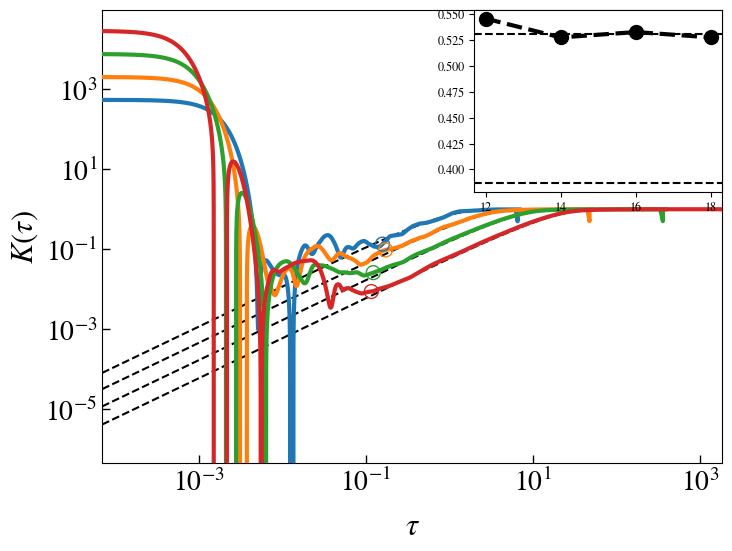

In [82]:
reload_modules()
user_settings = getattr(cf.plot_settings, 'settings')
fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(8,6), dpi = 100)
vals_sff = hfun.get_scaling_array(user_settings, 0.02, 0.9, 0.1)
#vals_sff = [0.04, 0.1, 0.2, 0.3, 0.5]
plot_deviation = 0

if plot_deviation:
    sff_module.plot_deviation(axis=axis, vals=vals_sff, folded = True, func_x = lambda x, a: x / a**1)
else:
    #axis.grid(b=True, which='major', color='0.65', linestyle='-')
    #axis.grid(b=True, which='minor', color='0.85', linestyle='--')
    
    width = 0.4
    height= 0.4
    left, bottom, width, height = [1 - width, 1 - height, width, height]
    axis2 = hfun.add_subplot_axes(axis, [left, bottom, width, height])

    sff_module.plot(axis=axis, vals=vals_sff, axis_inset=axis2, zoom = False, folded = True, func_x = lambda x, a: x / a**2)

L w
[12 14 16 18]
w L
[0.2, 0.3, 0.4, 0.5, 0.7, 0.9]


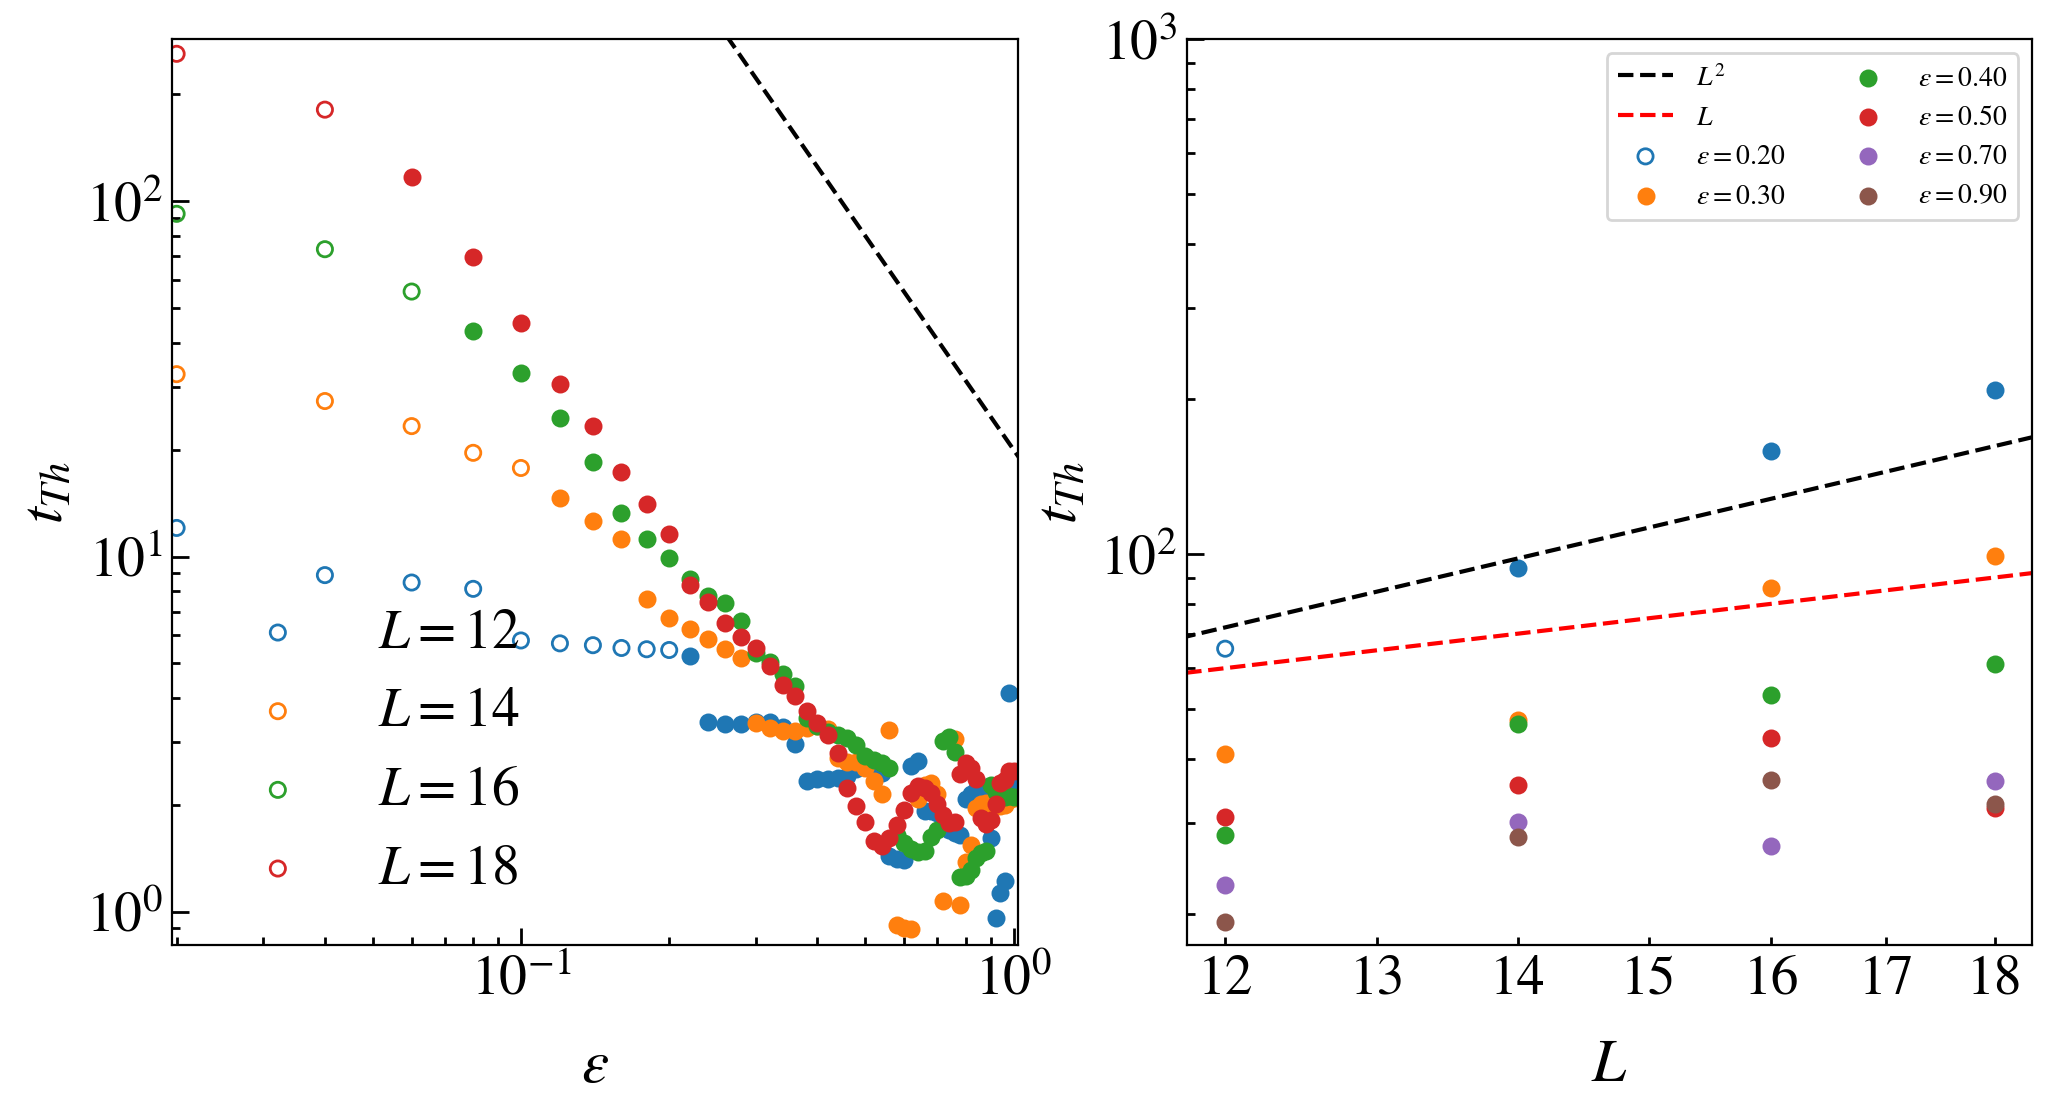

In [48]:
reload_modules()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi = 200)

vals = hfun.regspace(0.02, 1.02, 0.02)
sizes = np.array(range(12, 19, 2))
sizes2 = np.array(range(12, 19, 2))

FOLDED = False
def load_data(scaling_vals, vs_vals, setts):
    xvals = []
    gap_ratio = []
    thouless_time = []
    set_class = copy.deepcopy(cf.plot_settings)
    set_class.set_vs(setts['scaling'])
    set_class.set_scaling(setts['vs'])
    new_setts = getattr(set_class, 'settings')
    print(new_setts['vs'], new_setts['scaling'])
    for y in scaling_vals:
        cf.params_arr[new_setts['vs_idx']] = y
        r_arr = []
        tau_arr = []
        for x in vs_vals:
            status, _, _, tH_tmp, tau, r , _ = sff_module.load(settings=new_setts, parameter = x, folded=FOLDED)
            if new_setts['vs_idx'] == 0: tau /= y
            if status:
                tau_arr.append(tau if FOLDED else tau * tH_tmp)
                r_arr.append(r)

            else:
                tau_arr.append(np.nan)
                r_arr.append(np.nan)

        thouless_time.append(np.array(tau_arr))
        gap_ratio.append(np.array(r_arr))
        xvals.append(np.array(vs_vals))

    return np.array(xvals), np.array(thouless_time), np.array(gap_ratio)

set_class_plot1 = copy.deepcopy(cf.plot_settings)
set_class_plot1.set_vs('w')
set_class_plot1.set_scaling('L')
settings_plot1 = getattr(set_class_plot1, 'settings')
xvals, thouless_time, gap_ratio = load_data(scaling_vals=sizes2, vs_vals=vals, setts=settings_plot1)
c = thouless.replot_taus(axis=ax1, vals=sizes2, xvals=xvals, tau=thouless_time, gap_ratio=gap_ratio, settings = settings_plot1, fontsize=20, linewidth=0., markersize=30)
aaa = np.logspace(-2, 1, 100)
ax1.plot(aaa, 2e1 / aaa**2, linestyle='--', color='black')


set_class_plot2 = copy.deepcopy(cf.plot_settings)
set_class_plot2.set_vs('L')
set_class_plot2.set_scaling('w')
settings_plot2 = getattr(set_class_plot2, 'settings')

vals_to_plot = [0.2, 0.3, 0.4, 0.5, 0.7, 0.9]
xvals, thouless_time, gap_ratio = load_data(scaling_vals=vals_to_plot, vs_vals=sizes, setts=settings_plot2)
c = thouless.replot_taus(axis=ax2, vals=vals_to_plot, xvals=xvals, tau=thouless_time, gap_ratio=gap_ratio, settings = settings_plot2, fontsize=20, linewidth=0., markersize=30)
aaa = np.linspace(10, 20, 100)
ax2.plot(aaa, 0.5*aaa**2, linestyle='--', color='black', label=r"$L^2$")
ax2.plot(aaa, 5*aaa, linestyle='--', color='red', label=r"$L$")
ax2.set_ylim(None, 1e3)
ax2.legend(ncol=2)

ax2.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))
ax2.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%d"%x))

# SPECTRAL FUNCTION

### PLOTTER FUNCTIONS

In [64]:
def plot_fig3(axis_spec = None, vals_spec = None, set_class = None, _site = None, _operator = None, annotate = True, alfa = 0.0):
    #-- set defaults
    if vals_spec is None:    vals_spec = hfun.get_scaling_array(settings=settings)
    if set_class is None:    set_class = cf.plot_settings
    settings = getattr(set_class, 'settings')

    if _site is None:       _site = settings['site']
    if _operator is None:   _operator = settings['operator']
    #name = "\\sigma^z_{L/2}" if _operator == 0 else "H_{L/2}"
    name = cf.operator_names_latex[_operator]
    idx = None
    try:    idx = name.index("j")
    except ValueError:  print("")
    try:    idx = name.index("q")
    except ValueError:  print("")
    if idx is not None:
        name = list(name);  name[idx] = "{{L/2}}"
        name = "".join(name)
    
    if axis_spec is not None:
        #-- loop over params
        wH = [];            LTA = [];
        wH_typ = [];        val_at_typ = [];
        relax_time = [];    val_at_relax = [];
        for i in range(0, len(vals_spec)):
            x = vals_spec[i]
            _, _, _, tau_r_fit1, _, _, _ = spec_fun.get_relax_times(vals=np.array([x]), set_class=set_class, operator=_operator, with_thouless=False)
            omega_r = 1. / tau_r_fit1
            status, xdata, ydata, wHnow, wHtypnow = spec_fun.load_spectral(settings=settings, 
                                                                        parameter=x,
                                                                        spec="spec",
                                                                        operator = _operator,
                                                                        site = _site
                                                                        )
            if status:
                ydata = ydata * (2**x / x if settings['scaling_idx'] == 0 else 2**cf.L / cf.L) # rescale by D
                ydata /= xdata**alfa
                p = axis_spec.plot(xdata, ydata,label=hfun.key_title(x, settings), linewidth=3)
                wH.append(wHnow);               idx = min(range(len(xdata)), key=lambda i: abs(xdata[i] - wHnow));        LTA.append(ydata[idx])
                wH_typ.append(wHtypnow);        idx = min(range(len(xdata)), key=lambda i: abs(xdata[i] - wHtypnow));     val_at_typ.append(ydata[idx])
                relax_time.append(omega_r);     idx = min(range(len(xdata)), key=lambda i: abs(xdata[i] - omega_r));      val_at_relax.append(ydata[idx])

        axis_spec.plot(np.zeros(1), np.zeros([1,len(vals_spec) - 3]), color='w', alpha=0, label=' ') # DUMMY ITEM TO CONTROL LEGEND ROWS

        axis_spec.plot(wH, LTA, linestyle='--', marker='o', color='black', linewidth=2, markersize=12, label=r"$\omega_H$")
        axis_spec.plot(wH_typ, val_at_typ, linestyle='--', marker='o', color='black', markerfacecolor='None', linewidth=2, markersize=12, label=r"$\omega_H^{typ}$")
        axis_spec.plot(relax_time, val_at_relax, linestyle='--', marker='s', color='black', markerfacecolor='None', linewidth=2, markersize=12, label=r"$1/t_r$")
        print(relax_time)

        hfun.set_plot_elements(axis = axis_spec, ylabel = "D\\cdot\\left\\langle\\left|\\left(" + name + "\\right)_{nm}\\right|^2\\right\\rangle / \\omega^{%.1f}"%alfa, xlabel = "\\omega", settings=settings, 
                                font_size=20, set_legend=True, xlim=(None, None), ylim=(None, None))
        axis_spec.legend(frameon=False, loc='lower left', ncol=2, fontsize=18, handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.02,-0.02))
        axis_spec.set_ylim(5e-2, 6e0)

        x=np.linspace(1e-2, 1, 100)
        if annotate:
            if cf.model == 2:
                axis_spec.plot(x, 0.1 / x**0.75, linestyle=':', color='black')
                axis_spec.annotate(r"$\omega^{-0.75}$", xy=(0.1, 1.0), size=18)
            else:
                axis_spec.plot(x, 0.4 / x**0.5, linestyle=':', color='black')
                axis_spec.annotate(r"$\omega^{-0.5}$", xy=(0.2, 1.0), size=18)

        axis_spec.tick_params(axis="both",which='major',direction="in",length=6)
        axis_spec.tick_params(axis="both",which='minor',direction="in",length=3)
    #axis_spec.grid(b=True, which='major', color='0.65', linestyle='-')
    #axis_spec.grid(b=True, which='minor', color='0.85', linestyle='--')
    #axis_time.grid(b=True, which='major', color='0.65', linestyle='-')
    #axis_time.grid(b=True, which='minor', color='0.85', linestyle='--')


### RESULTS


[18, 1.0, 0.55, 0.0, 0.25, 0, 1, 1, 0.0, 0.0]
[18, 1.0, 0.55, 0.0, 0.25, 0, 1, 1, 0.0, 0.0]
[18, 1.0, 0.55, 0.0, 0.25, 0, 1, 1, 0.0, 0.0]
[18, 1.0, 0.55, 0.0, 0.25, 0, 1, 1, 0.0, 0.0]
[18, 1.0, 0.55, 0.0, 0.25, 0, 1, 1, 0.0, 0.0]
[array([0.00100267]), array([0.00213648]), array([0.00279747]), array([0.0027656]), array([0.00256946])]
[14, 1.0, 0.55, 0.0, 0.25, 0, 1, 1, 0.0, 0.0]
[16, 1.0, 0.55, 0.0, 0.25, 0, 1, 1, 0.0, 0.0]
[18, 1.0, 0.55, 0.0, 0.25, 0, 1, 1, 0.0, 0.0]
../results/HEISENBERG/local_pert/OBC/IntegratedResponseFunction/j=9/SigmaZ_j=9_L=18,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=0.05.dat
../results/HEISENBERG/local_pert/OBC/IntegratedResponseFunction/j=9/SigmaZ_j=9_L=18,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=0.10.dat
../results/HEISENBERG/local_pert/OBC/IntegratedResponseFunction/j=9/SigmaZ_j=9_L=18,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=0.15.dat



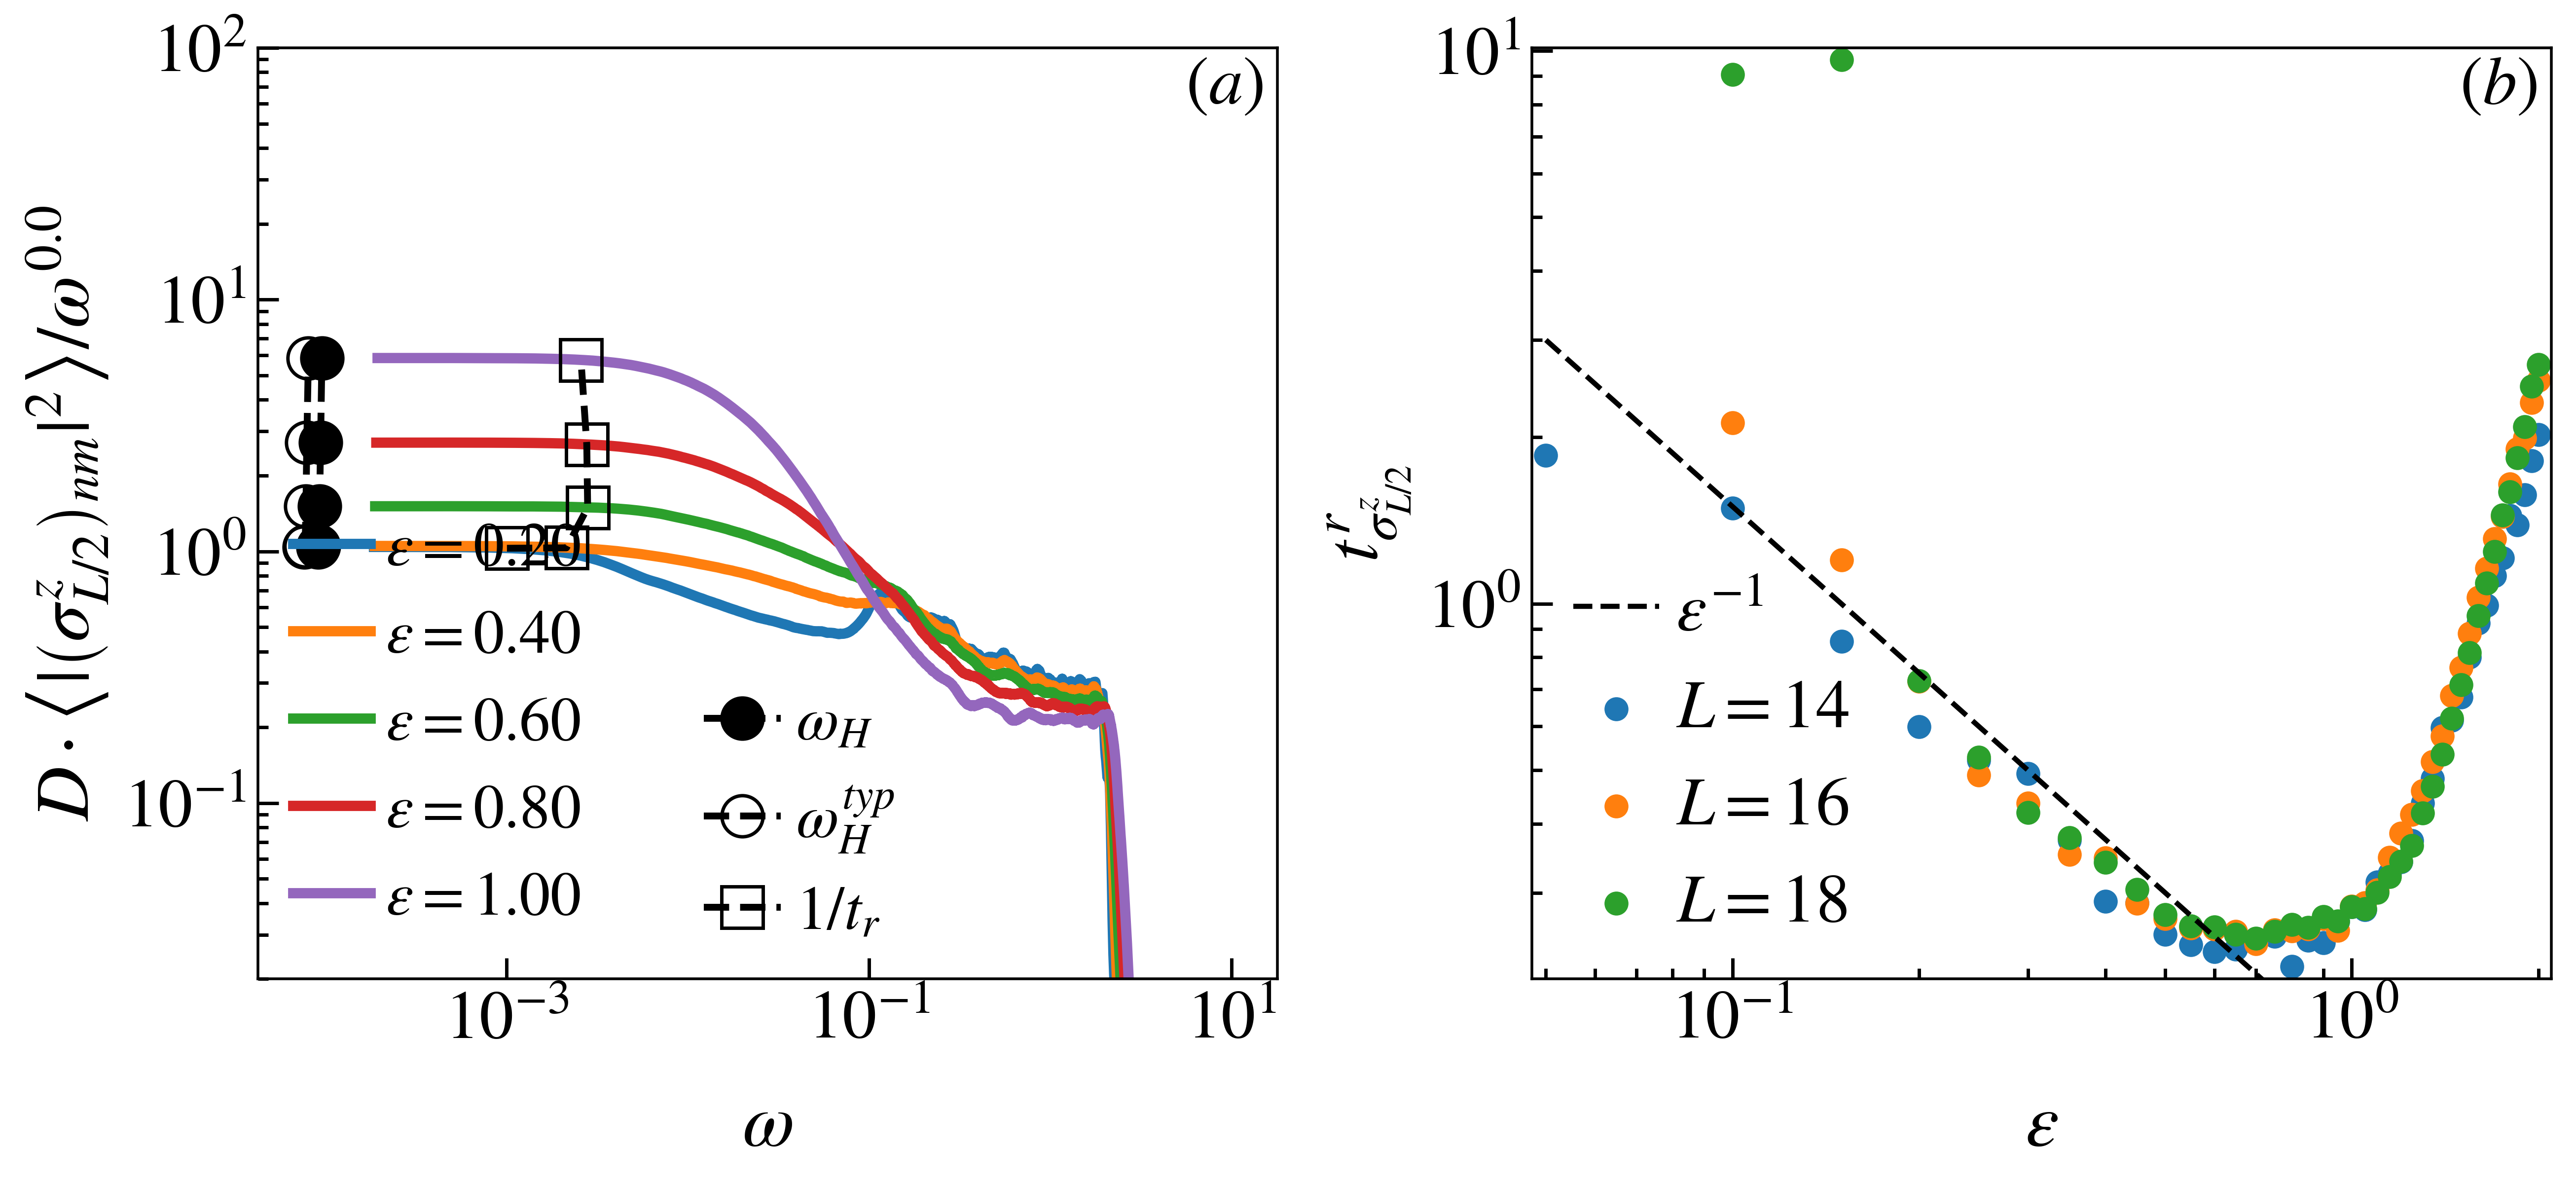

In [204]:
reload_modules()

fig, axis = plt.subplots( nrows=1, ncols=2, figsize=(12,5), dpi = 500)
fig.subplots_adjust(wspace=0.25, hspace=0.2)
set_class = copy.deepcopy(cf.plot_settings)
set_class.set_vs('x')
set_class.set_scaling('w')
settings = getattr(set_class, 'settings')

operator = 0

vals = hfun.get_scaling_array(settings=settings, 
                                    x0=0.2, 
                                    xend=1.02, 
                                    dx=0.2)
plot_fig3(axis_spec=axis[0], _operator=operator, _site=-1 if settings['scaling_idx'] == 0 else cf.params_arr[0] / 2, vals_spec=vals, set_class=set_class, annotate=False, alfa=0)
axis[0].set_ylim(2e-2, 1e2)

vals = hfun.get_scaling_array(settings=settings, 
                                    x0=0.05, 
                                    xend=2.02, 
                                    dx=0.05)

param_copy = copy.deepcopy(cf.params_arr)
y_min = 1e10
y_max = -1e10                    
if settings['scaling_idx'] != 0:     
    for L in range(14, 19, 2):
        cf.params_arr[0] = L
        status_th, _, tau_r, tau_r_fit, tH, _, _ = spec_fun.get_relax_times(vals=vals, set_class=set_class, operator=operator, site=L/2, with_thouless=False)
        if status_th:
            c = axis[1].plot(vals, tH, linestyle='--')
        xpoints = set_class.rescale(vals, 'x')
        ypoints = set_class.rescale(tau_r_fit, 'y') / L**2.5
        axis[1].scatter(xpoints, ypoints, marker='o', label=r"$L=%d$"%(L))
        ypoints = [y for y in ypoints if np.isnan(y) == False]
        if min(ypoints) < y_min: y_min = min(ypoints)
        if max(ypoints) > y_max: y_max = max(ypoints)


    ii = settings['scaling_idx']
    xlab = "q/\\pi" if ii == 5 else (hfun.var_name if ii == 2 else ("\\varepsilon" if ii == 4 and cf.model == 2 else settings['scaling']))
    axis[1].plot(vals, 1.5e-1 / vals**1., linestyle='--', color='black', label=r"$%s^{-1}$"%xlab)
    spec_fun.set_inset_style(axis[1], xpoints, settings)
    #axis[1].set_yscale('linear')
else:
    for w in hfun.regspace(0.2, 2.0, 0.2):
        cf.params_arr[4] = w
        status_th, _, tau_r, tau_r_fit, tH, _, _ = spec_fun.get_relax_times(vals=vals, set_class=set_class, operator=operator, site=-1, with_thouless=False)

        xpoints = set_class.rescale(vals, 'x')
        ypoints = set_class.rescale(tau_r_fit, 'y')
        axis[1].scatter(xpoints, ypoints, marker='o', label=r"$\varepsilon=%.1f$"%(w))
        ypoints = [y for y in ypoints if np.isnan(y) == False]
        if min(ypoints) < y_min: y_min = min(ypoints)
        if max(ypoints) > y_max: y_max = max(ypoints)

    axis[1].plot(xpoints, 1e2 * (xpoints/10)**2, linestyle='--', color='black', label=r"$L^{}$")
    spec_fun.set_inset_style(axis[1], xpoints, settings)
    #axis[1].set_xscale('linear')
    axis[1].set_xlim(8, 2e1)

axis[1].set_ylim(0.95 * y_min, 1.05 * y_max)
cf.params_arr = param_copy
    
#axis[1].plot(vals, 5e-1 / vals**2, linestyle='--', color='black', label=r"$%s^{-2}$"%hfun.var_name)
axis[1].legend(loc='lower left', ncol=1, fontsize=20, frameon=False, handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.02,-0.02))

axis[0].annotate(r"$(a)$", xy=(0.91, 0.94), fontsize=20, xycoords='axes fraction')
axis[1].annotate(r"$(b)$", xy=(0.91, 0.94), fontsize=20, xycoords='axes fraction')
name = cf.operator_names_latex[operator]
idx = None  
try:    idx = name.index("j")
except ValueError:  print("")
try:    idx = name.index("q")
except ValueError:  print("")
if idx is not None:
    name = list(name);  name[idx] = "{L/2}"
    name = "".join(name)

ylab = r"$t^r_{%s}$"%(name) + (r"$/L^{2.5}$" if settings['scaling_idx'] == 0 else "")
axis[1].set_ylabel(ylab)
axis[0].tick_params(axis="both",which='major',direction="in",length=6)
axis[0].tick_params(axis="both",which='minor',direction="in",length=3)
axis[1].tick_params(axis="both",which='major',direction="in",length=6)
axis[1].tick_params(axis="both",which='minor',direction="in",length=3)

#plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/FigA8.png", bbox_inches = 'tight', padding=0.02)
#plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/FigA8.pdf", bbox_inches = 'tight', padding=0.02)

Text(0.5, 0, '$\\varepsilon$')

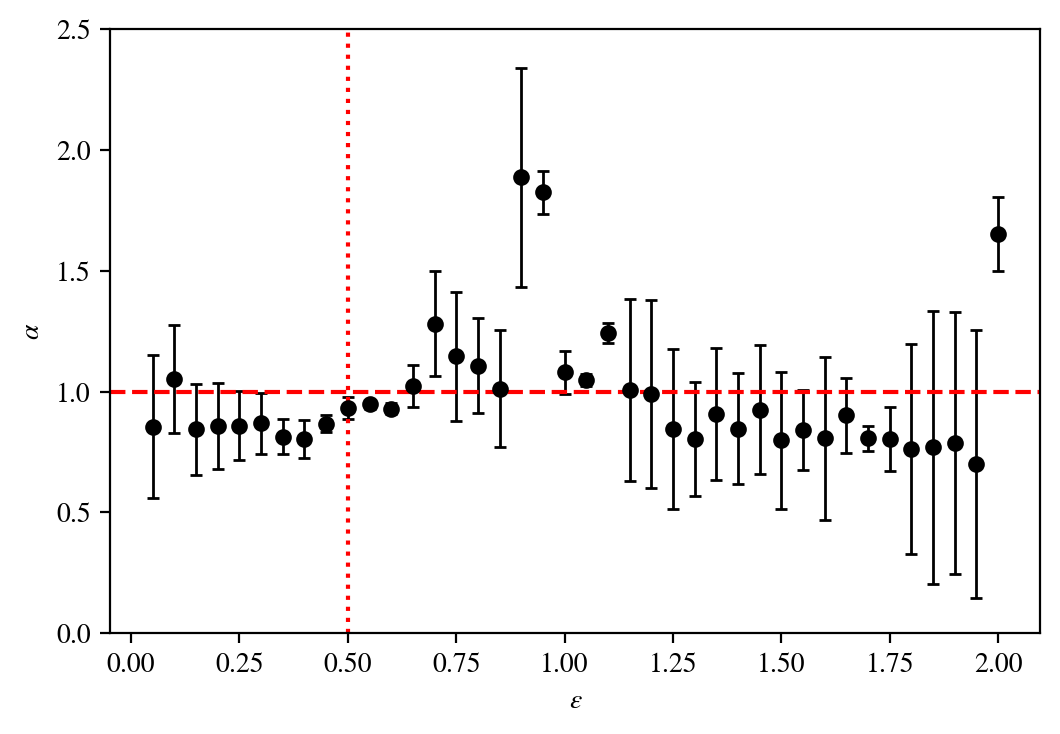

In [200]:
reload_modules()

new_set_class = copy.deepcopy(cf.plot_settings)
new_set_class.set_vs('L')
new_set_class.set_scaling("w")
new_set_class._settings['operator'] = 8
settings = getattr(new_set_class, 'settings')

x0 = 0.05
xend = 2.01
dx = 0.05
vals = hfun.get_scaling_array(settings, x0, xend, dx)

#--- load data and plot one-by-one
wH = [];    LTA = []
wH_typ = [];    val_at_typ = [];

exponent = []
errors = []
sizes = range(12, 19, 2)
for x in vals:
    param_copy = copy.deepcopy(cf.params_arr)
    maxima = []
    sizes_fit = []
    for L in sizes if x < 0.7 else sizes[1:]:
        cf.params_arr[0] = L
        status, xdata, ydata, wHnow, wHtypnow = spec_fun.load_spectral(settings=settings, 
                                                parameter=x,
                                                spec="spec",
                                                normalise=False,
                                                operator = settings['operator'],
                                                site = settings['site'],
                                                use_derivative = use_derivative
                                                )
        if status:
            idx = ydata.argmax()
            maxima.append(xdata[idx])
            sizes_fit.append(L)
    
    if len(maxima) > 2:
        pars, pcov = fit(f=power_law, 
                            xdata=sizes_fit, 
                            ydata=maxima,
                            maxfev=10000)
        exponent.append(-pars[0])
        #exponent.append( -np.log(maxima[-1] / maxima[-2]) / np.log(sizes_fit[-1] / sizes_fit[-2]) )
        errors.append(np.sqrt(np.diag(pcov)[0]))
    else:
        exponent.append(np.nan)
        errors.append(np.nan)



fig, axis = plt.subplots(nrows=1,ncols=1,figsize=(6,4), dpi = 200)
axis.errorbar(vals, exponent, yerr=errors, marker='o', color='black', markersize=5, linewidth=0, elinewidth=1, capsize=2)
axis.set_ylim(0., 2.5)
axis.axhline(y=1.0, linestyle='--', color='red')
axis.axvline(x=0.5, linestyle=':', color='red')
axis.set_ylabel(r"$\alpha$")
axis.set_xlabel(r"$\varepsilon$")

# ENTAGLEMENT ENTROPY

Fit not converged
Fit not converged
Fit not converged
Fit not converged
Fit not converged
Fit not converged


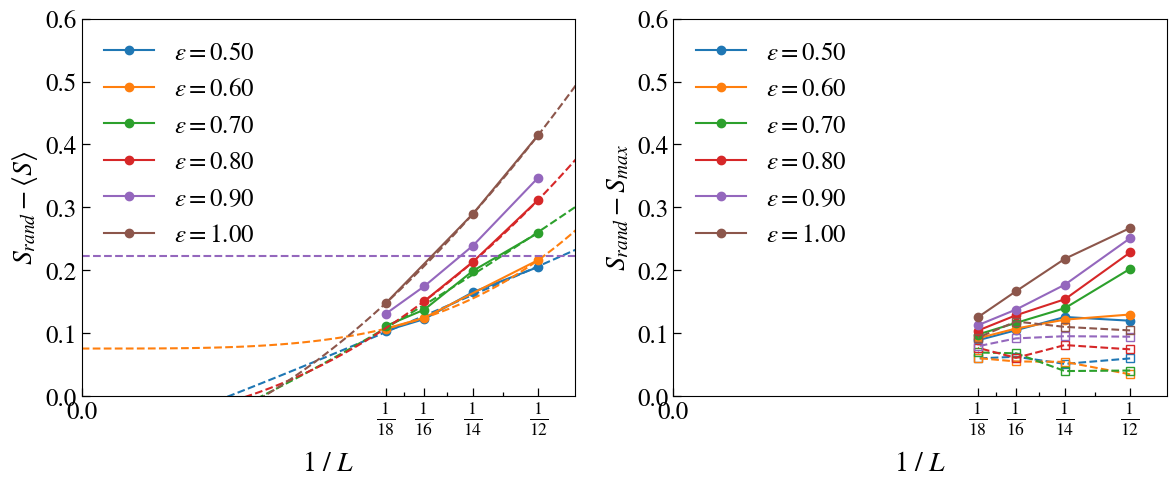

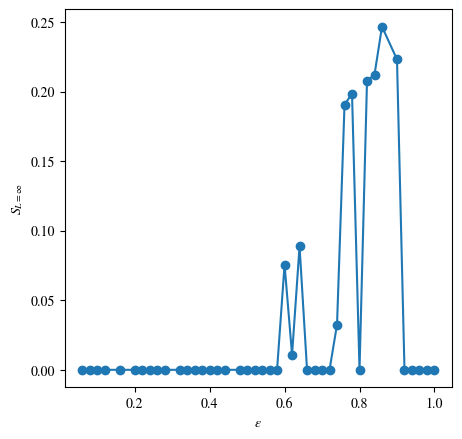

In [195]:
fig, axes = plt.subplots( nrows=1, ncols=2, figsize=(14,5), dpi = 100)
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 100)

f = 1/2.

def page(L, f):    
    return f * L * np.log(2) - binom(2 * f * L, f * L) / binom(L, L/2) / 2
def Srand(L, f): 
    return page(L, f) + (f + np.log(1-f)) / 2. 
dir = cf.base_directory + "Entropy/Eigenstate/"

param_copy = copy.deepcopy(cf.params_arr)
eps_to_plot = hfun.regspace(0.5, 1.1, 0.1)
eps_range = hfun.regspace(0.02, 1.1, 0.02)

eps_range_found = []
offset = []
for eps in eps_range:
    cf.params_arr[4] = eps
    Smean_ener = []
    Smax = []
    Smax_outlier = []
    validL = []
    validL_2 = []
    for L in range(12, 19, 1):    
        cf.params_arr[0] = L
        info = str(hfun.info_param(cf.params_arr))
        info = dir + info[0 : info.index('.dat') :]

        filename = info + "_subsize=%d.hdf5"%(f * L)
        if exists(filename) and abs(int(f * L) - f * L) < 0.01:
            data = []
            with h5py.File(filename, "r") as file:
                energies = np.array(file.get('energies')[0])
                entropy = np.array(file.get('entropy')[0])

                gaps = np.diff(energies) 

            Smax_outlier.append(max(entropy))
            entropy_smoothed = hfun.remove_fluctuations(entropy, bucket_size=10)
            entropy_smoothed2 = savgol_filter(entropy, window_length=15, polyorder=5, mode="nearest")
            size = energies.size
            gap_ratio = 0
            # get mean energy
            def get_S(idx):
                num = 200 if L > 8 else 100
                #num = 0.5 * size
                my_min = int(idx - num / 2);    
                if my_min < 0: my_min = 0
                
                my_max = int(idx + num / 2);    
                if my_max>= size: my_max = size

                sample = entropy[my_min : my_max]
                ratio = 0
                counter = 0
                for i in range(int(my_min), int(my_max)):
                    ratio += min(gaps[i], gaps[i + 1]) / max(gaps[i], gaps[i + 1])
                    counter += 1
                gap_ratio = ratio / counter
                return np.mean(sample), gap_ratio

            E_av = np.mean(energies)
            idx = min(range(len(energies)), key=lambda i: abs(energies[i] - E_av))
            entro, gap_ratio = get_S(idx)
            
            if np.abs(gap_ratio - 0.5306) < 0.05:
                Smean_ener.append(entro)
                validL_2.append(L)
            validL.append(L)
            Smax.append(max(entropy_smoothed))


    validL = np.array(validL)
    if len(validL_2) > 0:
        validL_2 = np.array(validL_2)
        status = False
        if not any(np.isnan(Smean_ener[1:])):
            ent_fit = np.abs(Smean_ener - Srand(L=validL_2, f=f))
            status = True
            try:
                pars, sth = fit(f=power_law_offset, 
                                    xdata=1./validL_2, 
                                    ydata=ent_fit,
                                    maxfev=10000)
                
                offset.append(0.0 if pars[2] < 0 else pars[2])
                eps_range_found.append(eps)
            except Exception:
                status = False
                print("Fit not converged")

        if eps in eps_to_plot:
            if status:
                Ls = np.linspace(0, 0.11, 100)
                plot = axes[0].plot(1. / validL_2, ent_fit, marker='o', label = r"$\varepsilon=%.2f$"%eps)# + r"  $S_{L=\infty}=%.2f$"%pars[2])
                axes[0].plot(Ls, power_law_offset(Ls, *pars), linestyle='--', color=plot[0].get_color())
            else:
                plot = axes[0].plot(1. / validL_2, ent_fit, marker='o', label = r"$\varepsilon=%.2f$"%eps)
            
            plot = axes[1].plot(1. / validL, np.abs(Smax         - Srand(L=validL, f=f)), marker='o', label = r"$\varepsilon=%.2f$"%eps)
            plot = axes[1].plot(1. / validL, np.abs(Smax_outlier - Srand(L=validL, f=f)), marker='s', color=plot[0].get_color(), markerfacecolor='None', linestyle='--')

ax.plot(eps_range_found, offset, marker='o')


limit = -(f + np.log(1-f)) / 2
#for axis in axes:   axis.axhline(y = limit, linestyle=':', color="black")

hfun.set_plot_elements(axis = axes[0], ylabel = "S_{rand} - \\langle S\\rangle", xlabel = "1\ / \ L", settings=user_settings, 
                            font_size=18, set_legend=True, xlim=(None, None), ylim=(None, None))
hfun.set_plot_elements(axis = axes[1], ylabel = "S_{rand} - S_{max}", xlabel = "1\ / \ L", settings=user_settings, 
                            font_size=18, set_legend=True, xlim=(None, None), ylim=(None, None))
#ax.legend(frameon=True, ncol=1
#                , loc='center left'
#                , fontsize=14)


for axis in axes:
    axis.set_xlim(0.0, 0.09)
    axis.set_xscale('linear')    
    axis.set_yscale('linear')
    axis.tick_params(axis="both",which='major',direction="in",length=6)
    axis.tick_params(axis="both",which='minor',direction="in",length=3)


for axis in axes:
    sizes = np.array([12, 14, 16, 18])
    axis.set_xticks(list([0.0]) + list(1. / sizes))
    axis.set_xticklabels([r"$\frac{1}{%d}$"%x if x > 0 else "0.0" for x in (list([0.0]) + list(sizes)) ])
    axis.xaxis.set_minor_locator(plt.FixedLocator(1. / (sizes - 1)))
    axis.set_ylim(0.0, 0.6)

#ax.axhline(y = limit, linestyle=':', color="black")
ax.set_xlabel(r"$\varepsilon$")
ax.set_ylabel(r"$S_{L=\infty}$")

fig.subplots_adjust(wspace=0.3, hspace=0.3)


#--- reset defaults
cf.params_arr = param_copy

In [205]:
reload_modules()

sub_system_fraction = 1/2



validL = []
vanishing_frac = hfun.regspace(20, 1000, 20)
fractions = np.array(list(hfun.regspace(0.01, 1.0, 0.01)) + list(vanishing_frac) )
frac_to_scale = [0.02, 0.1, 0.25, 0.5, 200, 500]

def page(L, f):    
    return f * L * np.log(2) - binom(2 * f * L, f * L) / binom(L, L/2) / 2
def Srand(L, f): 
    return page(L, f) + (f + np.log(1-f)) / 2. 

def get_scaling_of_S(fractions, axis1 = None, axis2 = None, axis_gaps = None, axis_structure = None, k=0, p=1, x=-1, frac_to_scale = [0.02, 0.1, 0.25, 0.5, 200, 500]):

    Lmin = 12 

    
    S_size_scale = [[] for i in (frac_to_scale)]
    E_at_range_min = [[] for i in (frac_to_scale)]
    E_at_range_max = [[] for i in (frac_to_scale)]
    validL = []
    Smax = []
    Smax_sm = []
    

    param_copy = copy.deepcopy(cf.params_arr)
    for L in range(Lmin, 21, 2):
        cf.params_arr[0] = L
        info = hfun.info_param(cf.params_arr)
        info = dir + info[0 : info.index('.dat') :]

        filename = info + "_subsize=%d.hdf5"%(sub_system_fraction * L)
        if exists(filename) and abs(int(sub_system_fraction * L) - sub_system_fraction * L) < 0.01:

            validL.append(L)
            S = []
            gap_ratio = []
            S_vanishing_frac = []
            with h5py.File(filename, "r") as file:
                # Print all root level object names (aka keys) 
                # these can be group or dataset names 
                energies = np.array(file.get('energies')[0])
                entropy = np.array(file.get('entropy')[0])

                gaps = np.diff(energies)
                

                Smax.append(max(entropy))
                entropy_smoothed = hfun.remove_fluctuations(entropy, bucket_size=10)
                entropy_smoothed2 = savgol_filter(entropy, window_length=15, polyorder=13, mode="nearest")
                size = energies.size
                
                if axis_structure is not None:
                    plot = axis_structure.plot(energies / L, entropy, marker = 'o', linewidth=0, markerfacecolor='None', markersize=2, label=r"$L=%d$"%L)
                    axis_structure.axhline(y=page(L, sub_system_fraction), linestyle='--', color = plot[0].get_color())
                    axis_structure.axhline(y=Srand(L, sub_system_fraction), linestyle=':', color = plot[0].get_color())
                    axis_structure.fill_between(energies / L, Srand(L, sub_system_fraction), page(L, sub_system_fraction), color=plot[0].get_color(), alpha=.2)
                    #axis_structure.plot(energies / L, (entropy_smoothed - page(L, sub_system_fraction)), color = plot[0].get_color())
                    
                Smax_sm.append(max(entropy_smoothed2))

            for f in (fractions):

                # get mean energy
                E_av = np.mean(energies)
                idx = min(range(len(energies)), key=lambda i: abs(energies[i] - E_av))

                num = f * size
                if f > 1.0:
                    num = f
                my_min = int(idx - num / 2) if int(idx - num / 2) > 0 else 0
                my_max = int(idx + num / 2) if int(idx + num / 2) < size else size - 2

                if axis_gaps is not None:
                    ratio = 0
                    counter = 0
                    for i in range(int(my_min), int(my_max)):
                        ratio += min(gaps[i], gaps[i + 1]) / max(gaps[i], gaps[i + 1])
                        counter += 1
                    gap_ratio.append(ratio / counter)

                sample = entropy[my_min : my_max]
                S.append(np.mean(sample))
                if f > 1:
                    S_vanishing_frac.append(np.mean(sample))

                if f in frac_to_scale:
                    if f > 1.0:
                        num = f
                    my_min = int(idx - num / 2) if int(idx - num / 2) > 0 else 0
                    my_max = int(idx + num / 2) if int(idx + num / 2) < size else size - 1

                    sample = entropy[my_min : my_max]
                    idx = list(frac_to_scale).index(f)
                    S_size_scale[idx].append(np.mean(sample))
                    E_at_range_min[idx].append(energies[my_min])
                    E_at_range_max[idx].append(energies[my_max])

            if len(fractions) > 10:
                idx_last = len(fractions) - len(vanishing_frac)
                pars, sth = fit(f=stretch_exp, 
                                xdata=fractions[:idx_last], 
                                ydata=(Srand(L, sub_system_fraction) - S)[:idx_last])

            if axis1 is not None:
                plot = axis1.plot(fractions, Srand(L, sub_system_fraction) - S, label=r"$L=%d:\quad e^{%.2f\cdot \nu^{%.2f}}$"%(L, pars[2], pars[0]), marker='o', linewidth=0, markerfacecolor='None', markersize=2)
                axis1.plot(fractions, stretch_exp(fractions, *pars), linestyle='--', color = plot[0].get_color())
                
            if axis2 is not None:
                plot = axis2.plot(vanishing_frac, Srand(L, sub_system_fraction) - S_vanishing_fNac, label=r"$L=%d$"%(L), marker='o', linestyle='--')
            if axis_gaps is not None:
                plot = axis_gaps.plot(fractions, gap_ratio, label=r"$L=%d$"%(L), marker='o', linestyle='--')
                axis_gaps.set_xscale('log')
        else:
            print(filename)


    cf.params_arr = param_copy
    return np.array(validL), Smax, Smax_sm, S_size_scale, E_at_range_min, E_at_range_max

def plot_entropies(fig, axes, axis_gaps = None, axis_structure = None, k=0, p=1, x=-1, frac_to_scale = [0.02, 0.1, 0.25, 0.5, 200, 500]):

    validL, Smax, Smax_sm, S_size_scale, _, _ = get_scaling_of_S(fractions = fractions, axis1=axes[0][0], axis2=axes[0][1], axis_gaps=axis_gaps, axis_structure = axis_structure, frac_to_scale = frac_to_scale, k=k, p=p, x=x)
    axes[1][1].plot(1./validL, Srand(validL, sub_system_fraction) - Smax, label="outlier", marker='o')
    axes[1][1].plot(1./validL, Srand(validL, sub_system_fraction) - Smax_sm, label="smoothed", marker='o')

    for i, f in enumerate(frac_to_scale):
        key_label = r"$\nu=%.2f\cdot D$"%f if f < 1.0 else r"$f=%d$"%(f)
        axes[1][0].plot(1./validL, Srand(validL, sub_system_fraction) - S_size_scale[i], label=key_label, marker='o')



    for axis in [axes[0][0], axes[0][1], axes[1][0]]:
        hfun.set_plot_elements(axis = axis, ylabel = "S_{rand} - \\left\\langle S\\right\\rangle", xlabel = "\\nu", settings=user_settings, 
                                font_size=14, set_legend=True, xlim=(None, None), ylim=(None, None))
        axis.set_xscale('linear');    
        axis.set_yscale('linear')
    axes[0][1].set_xlabel(r"$f$")
    axes[0][1].set_xlim(0.0, 500)
    axes[0][1].set_ylim(0.0, None)
    axes[0][1].set_title(r"$\langle S\rangle=\sum_{n:\ |p-n| < 0.5\cdot f} S_n\qquad\ for\ E_{p}=\langle H\rangle$", fontsize=16)
    #axes[0][1].set_xscale('log')

    axes[0][0].set_ylim(0.0, 0.4)
    axes[0][0].set_xlim(0.0, 0.85)
    axes[0][0].set_title(r"$\langle S\rangle=\sum_{n:\ |p-n| < \nu\cdot D/2}S_n\qquad\ for\ E_{p}=\langle H\rangle$", fontsize=16)

    axes[1][0].set_xlabel(r"$1/L$")
    hfun.set_plot_elements(axis = axes[1][1], ylabel = "S_{page} - S_{max}", xlabel = "1/L", settings=user_settings, 
                            font_size=14, set_legend=True, xlim=(None, None), ylim=(None, None))
    axes[1][1].set_xscale('linear')
    axes[1][1].set_yscale('linear')
    fig.subplots_adjust(wspace=0.2, hspace=0.2)

    for axis in [axes[1][0], axes[1][1]]:
        sizes = np.array([8, 10, 12, 14, 16, 20])
        axis.set_xticks(list([0.0]) + list(1. / sizes))
        axis.set_xticklabels([r"$\frac{1}{%d}$"%x if x > 0 else "0.0" for x in (list([0.0]) + list(sizes)) ])
        axis.xaxis.set_minor_locator(plt.FixedLocator(1. / (sizes - 1)))
    axes[1][0].set_ylim(0, None)

    for axis in [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]:
        axis.set_ylim(0.0, 0.4)
        axis.tick_params(axis="both",which='major',direction="in",length=6)
        axis.tick_params(axis="both",which='minor',direction="in",length=3)


    #hfun.set_plot_elements(axis = ax[3], ylabel = "E_{min}", xlabel = "L", settings=user_settings, 
    #                            font_size=14, set_legend=True, xlim=(None, None), ylim=(None, None))
    #axes[[3].set_xscale('linear')
    

../results/HEISENBERG/local_pert/OBC/Entropy/Eigenstate/_L=20,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=0.50_subsize=10.hdf5


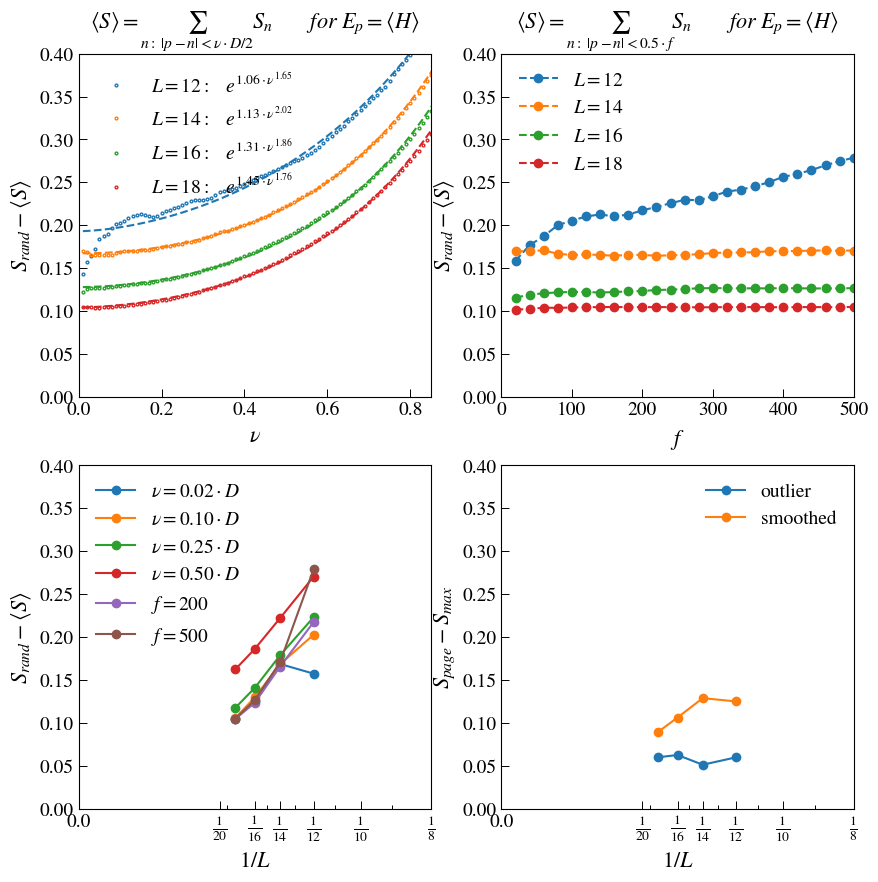

In [206]:
fig, axes = plt.subplots( nrows=2, ncols=2, figsize=(10,10), dpi = 100)
plot_entropies(fig, axes)

# MULTIFRACTALITY

../results/HEISENBERG/local_pert/OBC/MultiFractality/ParticipationRatio/_L=10,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=0.10_q=0.80.hdf5
252
../results/HEISENBERG/local_pert/OBC/MultiFractality/ParticipationRatio/_L=12,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=0.10_q=0.80.hdf5
924
../results/HEISENBERG/local_pert/OBC/MultiFractality/ParticipationRatio/_L=14,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=0.10_q=0.80.hdf5
3432
../results/HEISENBERG/local_pert/OBC/MultiFractality/ParticipationRatio/_L=16,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=0.10_q=0.80.hdf5
12870
../results/HEISENBERG/local_pert/OBC/MultiFractality/ParticipationRatio/_L=18,J=1.00,J0=0.00,g=0.55,g0=0.00,h=0.00,w=0.10_q=0.80.hdf5
48620


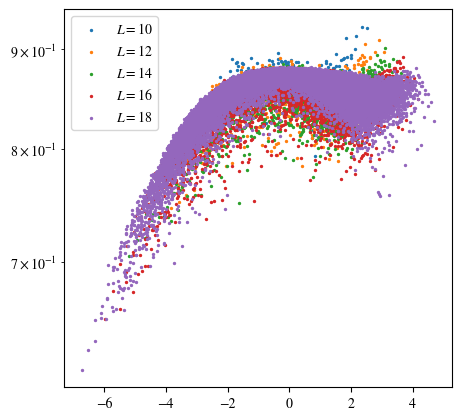

In [36]:
reload_modules()
cf.params_arr[4] = 0.1
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 100)

sizes = range(10, 19, 2)
q = 0.8

dirr = cf.base_directory + "MultiFractality" + kPSep + "ParticipationRatio" + kPSep
    
for L in sizes:
    cf.params_arr[0] = L
    filename = dirr + hfun.remove_info(hfun.info_param(cf.params_arr), 'x') + "_q=%.2f"%(q) + ".hdf5"
    print(filename)
    if exists(filename):
        with h5py.File(filename, "r") as f:
            # Print all root level object names (aka keys) 
            # these can be group or dataset names
            E = np.array(f.get('energies')[0])
            pr = np.array(f.get('participation_ratio')[0])
            print(E.size)
            ax.scatter(E, pr * E.size**(1 * (q-1)), label=r"$L=%d$"%L, s=2)

ax.legend()
ax.set_yscale('log')

[10. 12. 14. 16. 18.] [0.471744 0.482155 0.500024 0.519351 0.529755]
['None', 'None', 'None', 'blue', 'blue']
['None', 'None', 'None', 'green', 'green']
['None', 'None', 'None', 'red', 'red']
[10. 12. 14. 16. 18.] [0.493328 0.506628 0.526934 0.531186 0.529894]
[10. 12. 14. 16. 18.] [0.542329 0.522113 0.53261  0.529147 0.531379]
['blue', 'blue', 'blue', 'blue', 'blue']
['green', 'green', 'green', 'green', 'green']
['red', 'red', 'red', 'red', 'red']
[10. 12. 14. 16. 18.] [0.549716 0.510328 0.531939 0.529937 0.532782]
[10. 12. 14. 16. 18.] [0.498444 0.530855 0.531888 0.531338 0.531014]
[10. 12. 14. 16. 18.] [0.525297 0.54295  0.531077 0.529862 0.530906]
['blue', 'blue', 'blue', 'blue', 'blue']
['green', 'green', 'green', 'green', 'green']
['red', 'red', 'red', 'red', 'red']
[10. 12. 14. 16. 18.] [0.523561 0.545347 0.527159 0.532338 0.527182]
[10. 12. 14. 16. 18.] [0.51048  0.524172 0.529246 0.5313   0.530324]
[10. 12. 14. 16. 18.] [0.532216 0.537928 0.534439 0.53008  0.5307  ]
[10. 12. 1

Text(0.91, 0.04, '$(b)$')

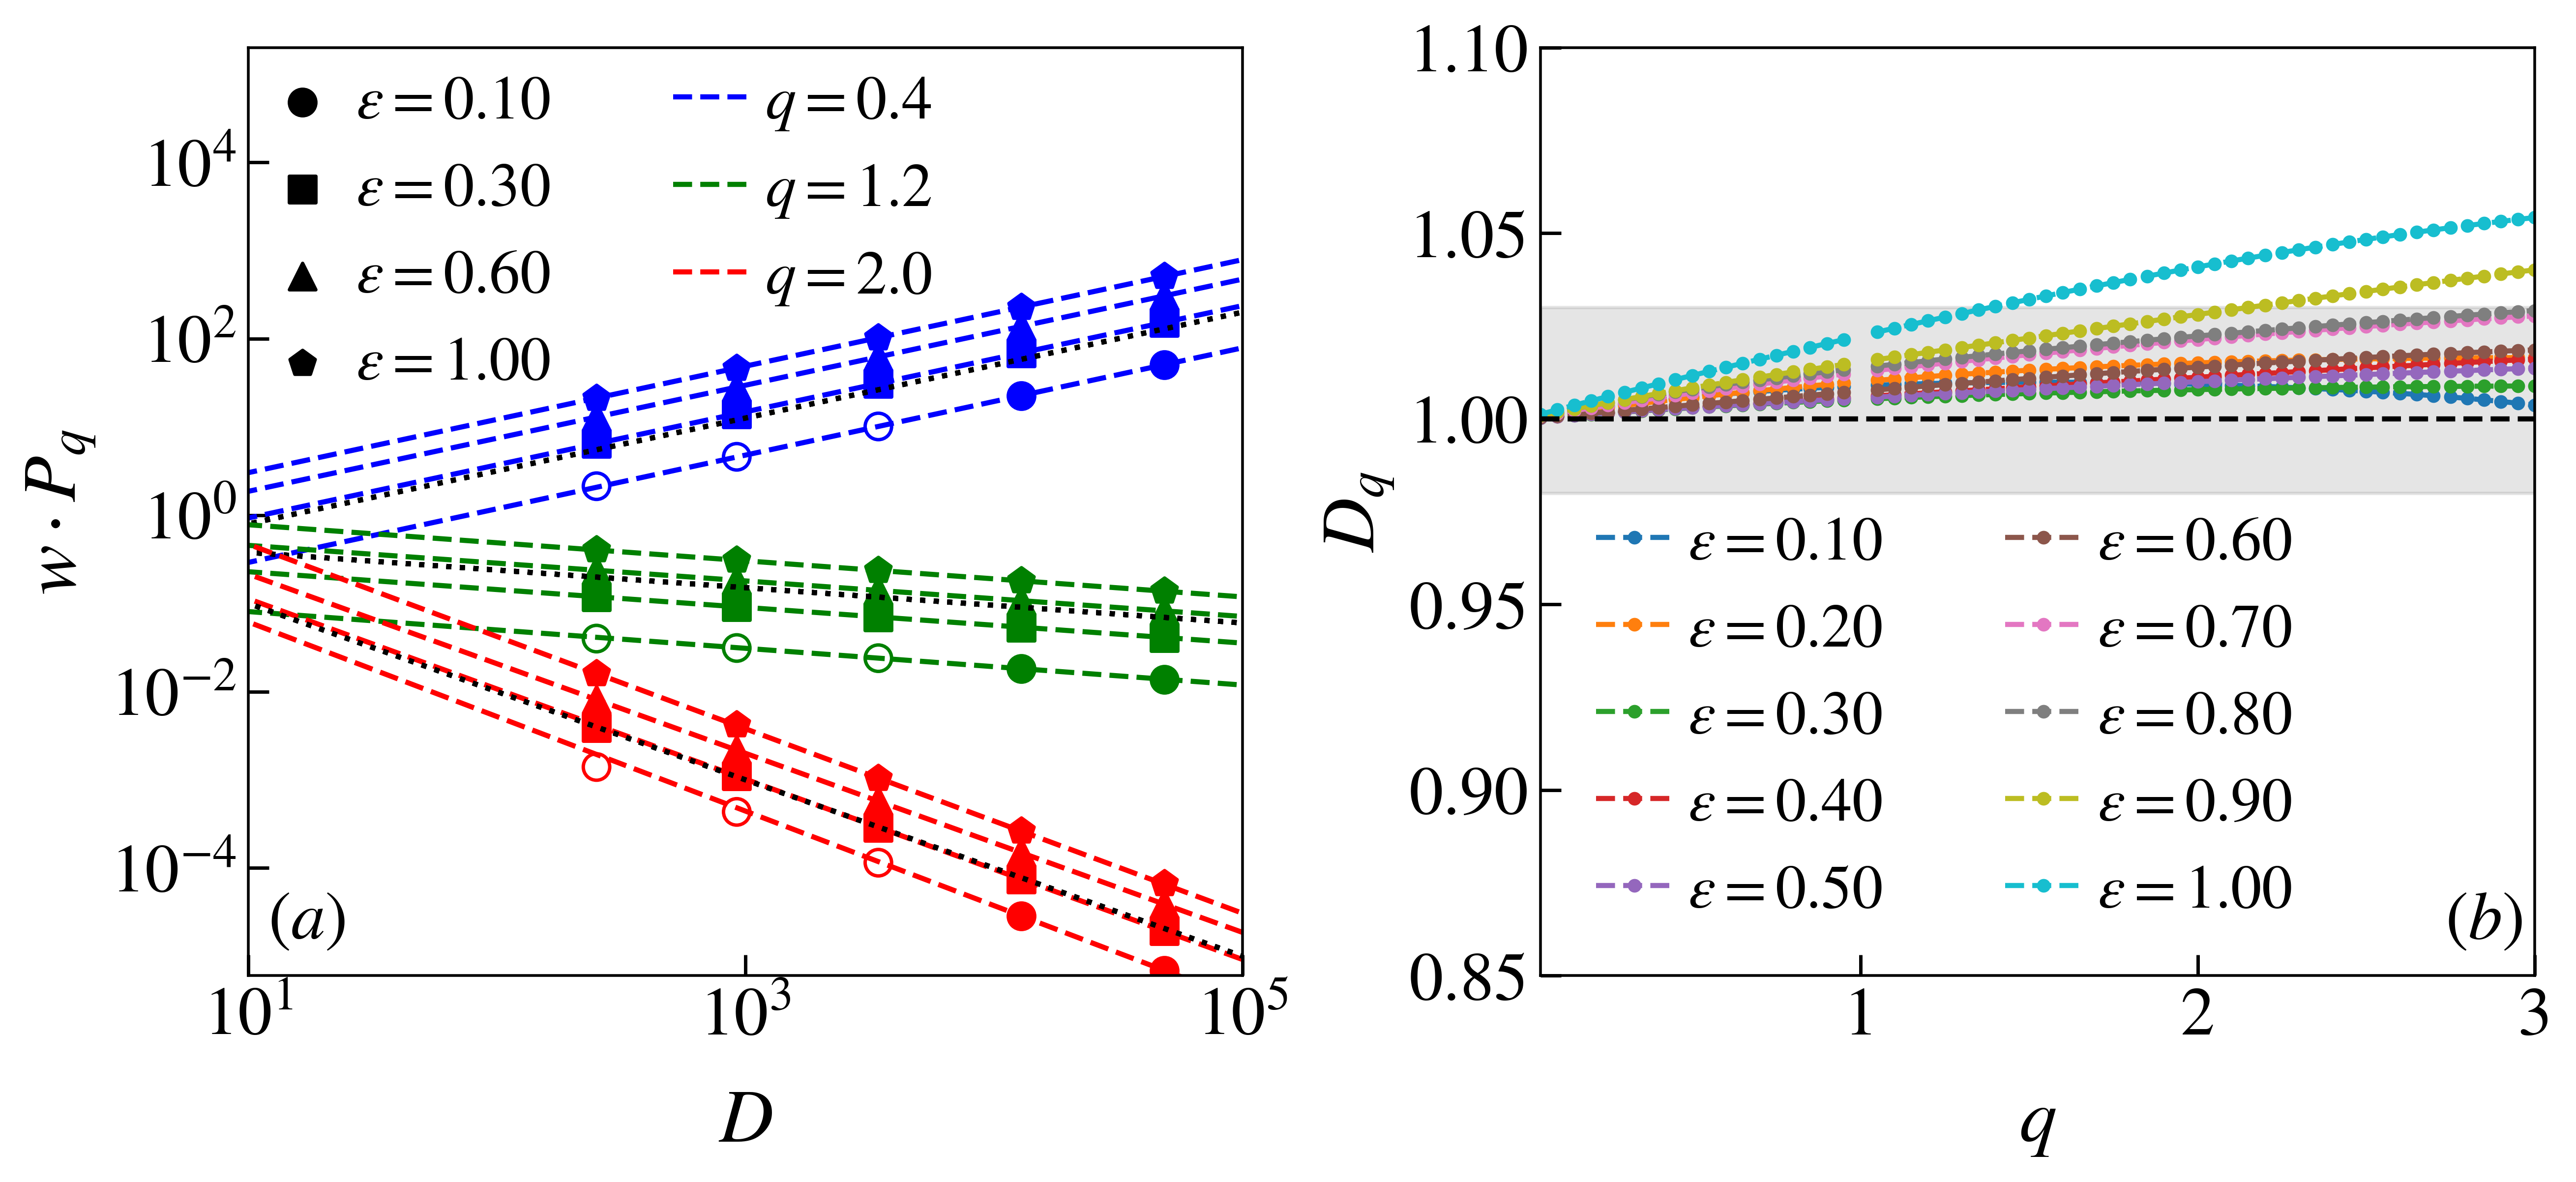

In [80]:
reload_modules()
fig, (ax, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(12,5), dpi = 500)
user_settings = getattr(cf.plot_settings, 'settings')

vals = hfun.regspace(0.1, 1.1, 0.1)
qs = hfun.regspace(0.05, 3.05, 0.05)
sizes = range(10, 19, 2)

x_to_plot = [0.1, 0.3, 0.6, 1.0]
q_to_plot = [0.4, 1.2, 2.0]

dirr = cf.base_directory + "MultiFractality" + kPSep + "ParticipationRatio" + kPSep

colorado = ['blue', 'green', 'red']
markerfield = ['o', 's', '^', 'p']

q_star = []
for x in vals:
    cf.params_arr[user_settings['scaling_idx']] = x
    qs_plot = []
    tau_q = []
    stats_name = cf.base_directory + "STATISTICS" + kPSep + hfun.remove_info(hfun.info_param(cf.params_arr), 'L') + ".dat" 
    stats = hfun.read_python_saved_dat_file(stats_name)
    gaps = stats[1]
    print(stats[0], gaps)
    for q in qs:
        pr = []
        dims = []
        pr_to_fit = []
        dim_to_fit = []
        for i, L in enumerate(sizes):
            cf.params_arr[0] = L
            filename = dirr + hfun.remove_info(hfun.info_param(cf.params_arr), 'x') + "_q=%.2f.hdf5"%(q)
            
            if exists(filename):
                with h5py.File(filename, "r") as f:
                    E = np.array(f.get('energies')[0])
                    dim = E.size

                    E_av = np.mean(E)
                    idx = min(range(len(E)), key=lambda i: abs(E[i] - E_av))
                    mu = 0.5 * dim
                    idx_min = int(idx - mu/2) if idx - mu/2 >= 0 else 0
                    idx_max = int(idx + mu/2) if idx + mu/2 < dim else dim
                    pr_tmp = np.array(f.get('participation_ratio')[0])[idx_min : idx_max]

                    pr.append(np.mean(pr_tmp))
                    dims.append(dim)
                    if np.abs(gaps[i] - 0.53) <= 0.02 and L >= 14:
                        pr_to_fit.append(np.mean(pr_tmp))
                        dim_to_fit.append(dim)
            else:
                print(filename)
        dims = np.array(dims)
        pr = np.array(pr)
        if len(pr_to_fit) > 1:
            pars, pcov = fit(f=power_law, 
                        xdata=dim_to_fit, 
                        ydata=pr_to_fit)
            alfa = np.log2(pr[-1] / pr[0]) / np.log2(dims[-1] / dims[0])
            #alfa = pars[0] 
            tau_q.append(-alfa)
            qs_plot.append(q)

            if x in x_to_plot and q in q_to_plot:
                xxx = np.logspace(-3, 5, 1000)
                colore = colorado[q_to_plot.index(q)]
                ax.plot(xxx, x * power_law(xxx, *pars), linestyle='--', color=colore)
                ax.plot(xxx, q / 2 * xxx**(1-q), linestyle=':', color='black')
                mfc = []
                for r in gaps: 
                    mfc.append( colore if abs(r-0.53) <= 0.02 else 'None' )
                print(mfc)
                for i in range(len(dims)):
                    #if i == 0:  ax.scatter(dims[i], x * pr[i], edgecolors=colore, marker = markerfield[x_to_plot.index(x)], facecolors=mfc[i], label=hfun.key_title(x, user_settings) + r"$\ q=%.1f$"%(q), s=80)
                    #else:       
                    ax.scatter(dims[i], x * pr[i], edgecolors=colore, marker = markerfield[x_to_plot.index(x)], facecolors=mfc[i], s=60)
            
    qs_plot = np.array(qs_plot)
    tau_q = np.array(tau_q)
    ax2.plot(qs_plot, tau_q / (qs_plot - 1.), label=hfun.key_title(x, user_settings), marker='o', markersize=3, linestyle='--')
    
    #ax2.scatter(qs_plot, tau_q, label=r"$w=%.2f$"%w, s=3)
    #ax2.plot(qs_plot, lin_fit2(qs_plot, *pars), linestyle='--')
#ax.set_yscale('log')              
for i, x in enumerate(x_to_plot):
    plot = ax.scatter(np.nan, np.nan, color='black', marker=markerfield[i], label=hfun.key_title(x, user_settings), s=60)
for i, q in enumerate(q_to_plot):
    plot = ax.plot(np.nan, np.nan, color=colorado[i], linestyle='--', label=r"$q=%.1f$"%(q))

hfun.set_plot_elements(axis = ax2, xlim = (None, None), ylim = (None, None), ylabel = "r", xlabel = "", settings=user_settings, font_size=20, set_legend=False)
ax2.legend(frameon=False, fontsize=18, ncol=2, handletextpad=0.25, handlelength = 1.25)
ax2.set_xlabel(r"$q$")
ax2.set_ylabel(r"$D_q$")
ax2.axhline(y=1.0, linestyle='--', color='black')
ax2.set_xscale('linear')
ax2.set_yscale('linear')
ax2.set_ylim(0.85, 1.1)
ax2.set_xlim(0.05, 3.0)
ax2.fill_between(qs, 0.98, 1.03, color='gray', alpha=.2)

hfun.set_plot_elements(axis = ax, xlim = (None, None), ylim = (None, None), ylabel = "r", xlabel = "", settings=user_settings, font_size=20, set_legend=False)
handles, labels = ax.get_legend_handles_labels()
order = [3, 4, 5, 6, 0, 1, 2]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', frameon=False, fontsize=18, ncol=2, handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.04, 1.03))


ax.set_ylabel(r"$w\cdot P_q$")
ax.set_xlabel(r"$D$")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e1, 1e5)
ax.set_ylim(6e-6, 2e5)
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for axis in [ax, ax2]:
    axis.tick_params(axis="both",which='major',direction="in",length=6)
    axis.tick_params(axis="both",which='minor',direction="in",length=3)
ax.annotate(r"$(a)$", xy=(0.02, 0.04), fontsize=20, xycoords='axes fraction')
ax2.annotate(r"$(b)$", xy=(0.91, 0.04), fontsize=20, xycoords='axes fraction')
#plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig_pr.pdf", bbox_inches = 'tight', padding=0.02)
#plt.savefig("../swap results/Heisenberg/DISORDER/PLOTS_FOR_PAPER1/Fig_pr.png", bbox_inches = 'tight', padding=0.02)